In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import Imputer
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def beautification():
    ax.set_facecolor('whitesmoke')
    ax.patch.set_alpha(.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.minorticks_on()
    ax.tick_params('both', length=8, which='major', labelsize='10')
    ax.tick_params('both',length=3, which='minor')
    ax.grid(True, which='major', ls='dashed', alpha=.5)
    ax.grid(True, which='minor', ls='dashed', alpha=.15)
    ax.legend(loc='best', markerscale=5)

In [5]:
data = np.genfromtxt('Norris14sigmananlabels.csv', unpack = True, names = True, delimiter = ',', skip_footer=0, dtype=None)

classifier = 'type'
types = list(sorted(set(data[classifier]), key=list(data[classifier]).index))
parameters = ['Mv', 'Mstar', 'Re', 'Sig']

structured = dict(zip(types,[dict(zip(parameters,
                                      [data[jval][data[classifier]==ival]
                                       for j, jval in enumerate(parameters)]))
                             for i, ival in enumerate(types)]))

ntarget = data['type']
ndata = np.vstack((data['Mv'],data['Mstar'],data['Re'],data['Sig'])).T
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
ndata = imp.fit_transform(ndata)

X = ndata
Y = ntarget
target_names = types

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, Y).transform(X)

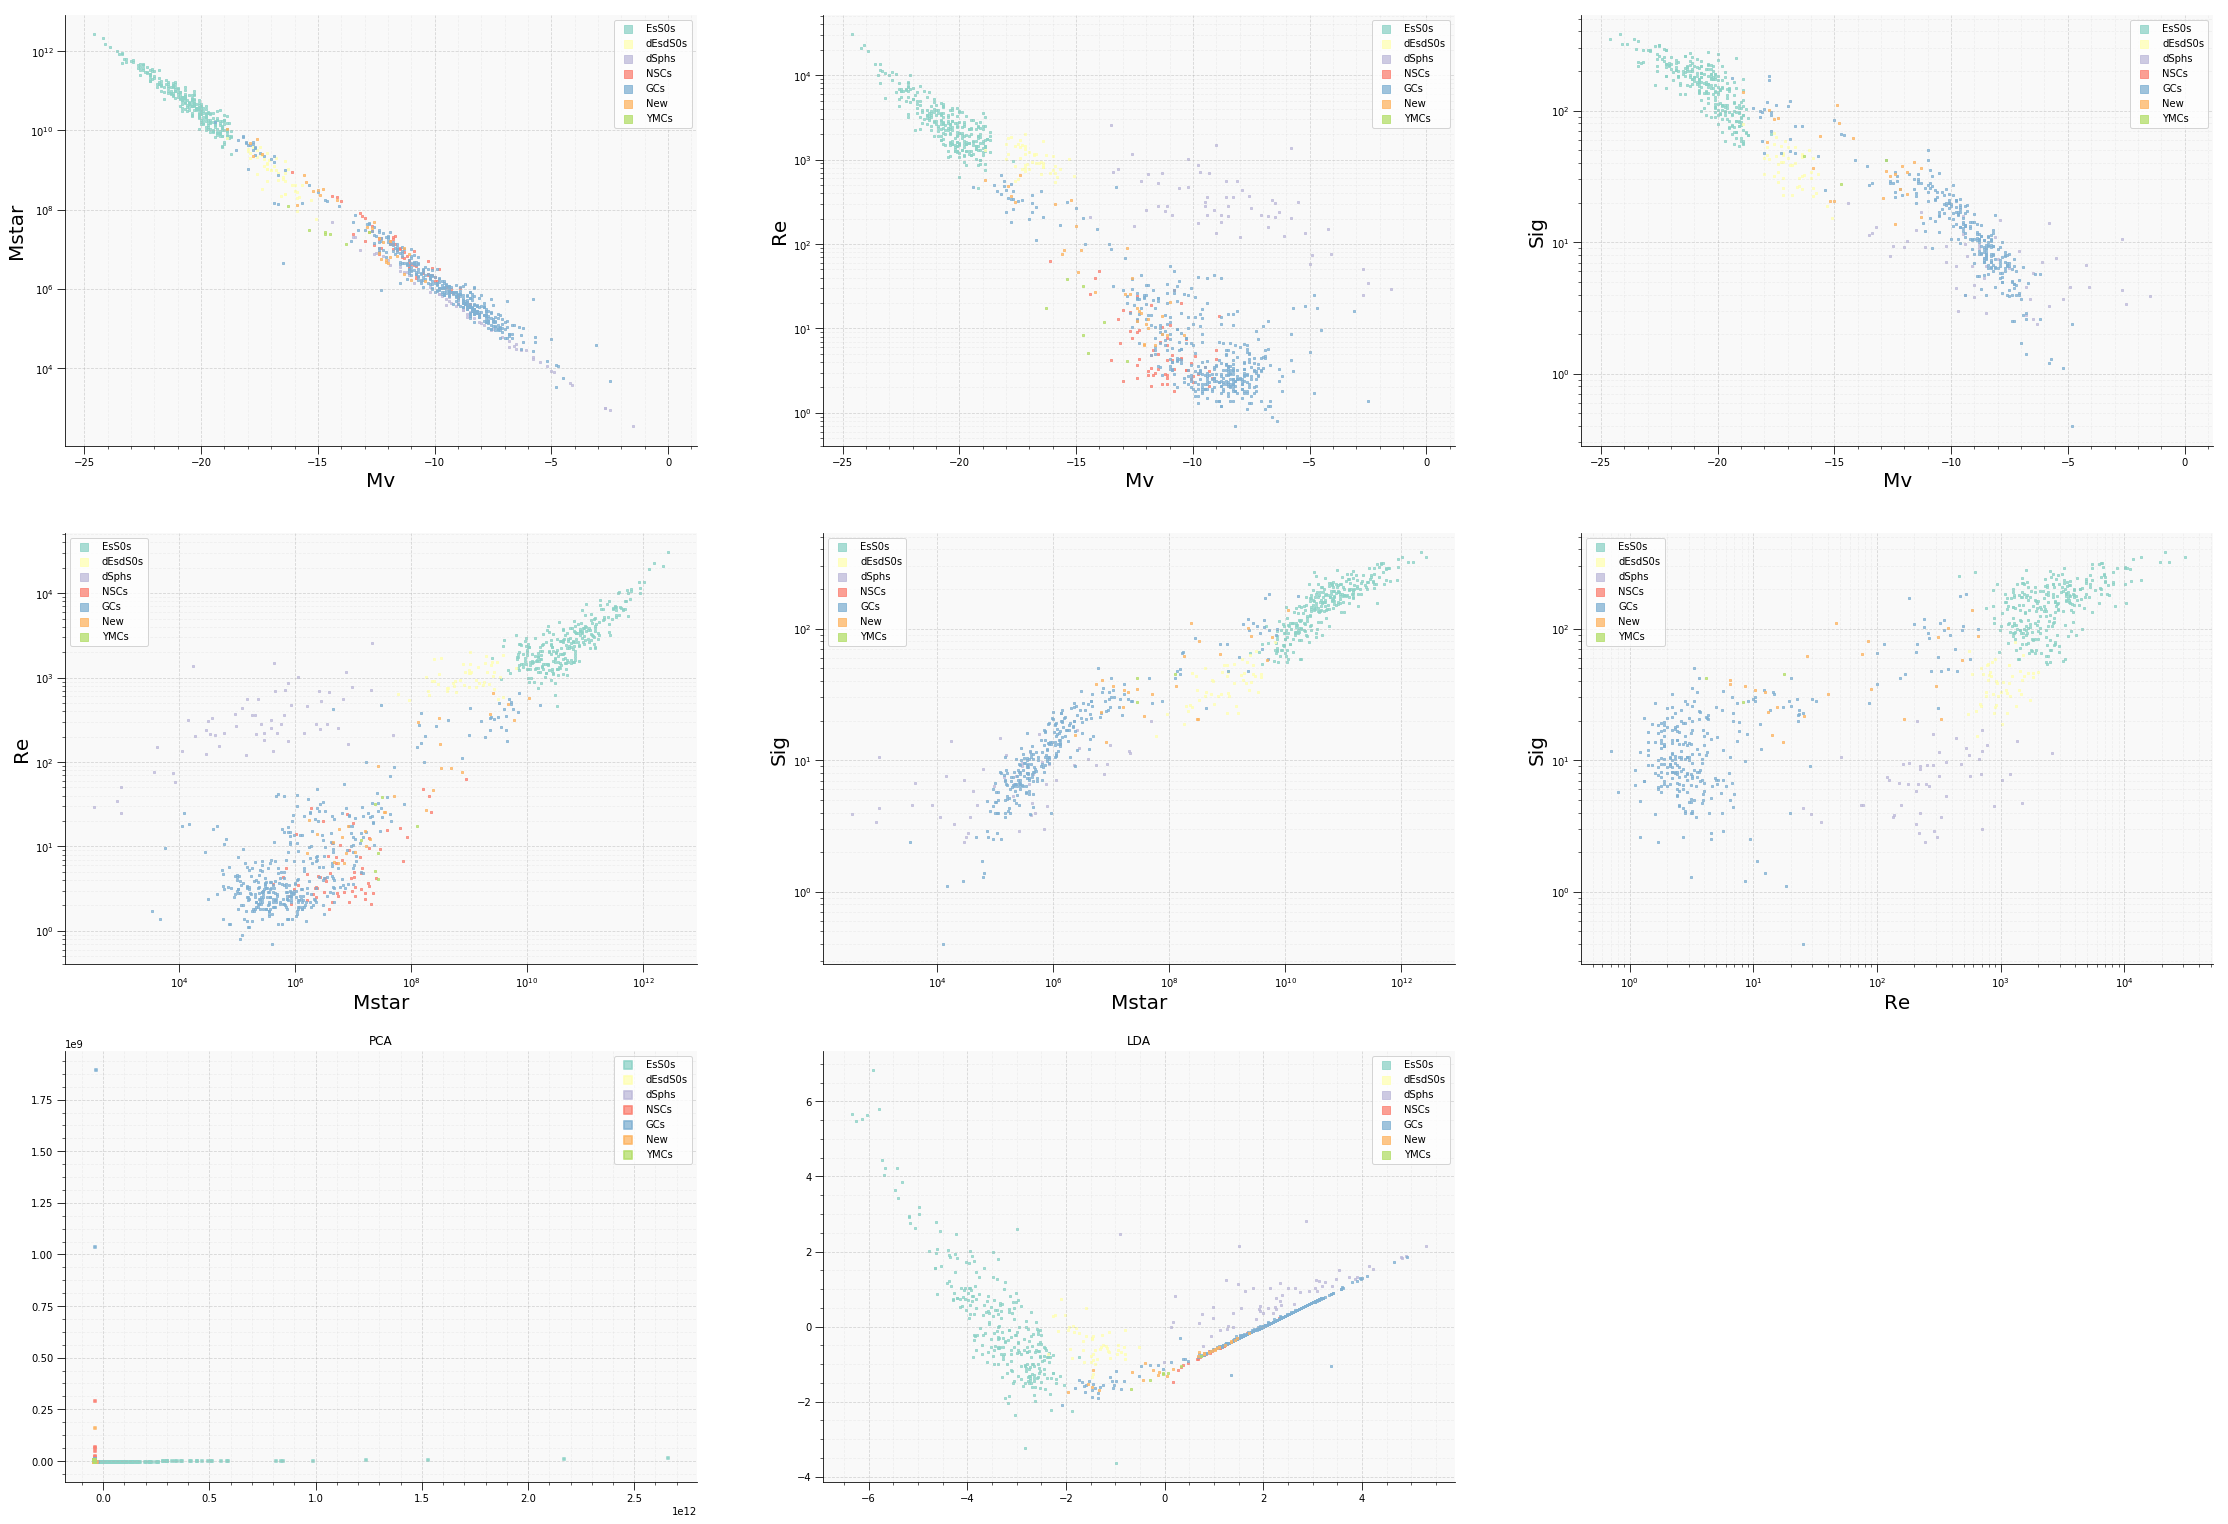

In [6]:
height_ratios = [8, 8, 8]
width_ratios = [12, 12, 12]
wspace = 1.25
hspace = 1.5
x = 0
y = 0

fig = plt.figure(figsize=(sum(width_ratios) + wspace *
                          (len(width_ratios) - 1),
                          sum(height_ratios) + hspace *
                          (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios),
                       len(width_ratios),
                       height_ratios=height_ratios,
                       width_ratios=width_ratios)

colors = [np.array([141,211,199])/255., np.array([255,255,179])/255.,
          np.array([190,186,218])/255., np.array([251,128,114])/255.,
          np.array([128,177,211])/255., np.array([253,180,98])/255.,
          np.array([179,222,105])/255., np.array([252,205,229])/255.,
          np.array([217,217,217])/255., np.array([188,128,189])/255.]

fig.suptitle('', fontsize=20)
location = 0
for i, ival in enumerate(parameters):
    for j, jval in enumerate(parameters):
        if i != j and j > i:
            ax = fig.add_subplot(gs[location])
            for k, kval in enumerate(types):
                if type(kval) == np.string_:
                    ax.scatter(structured['{}'.format(kval)]['{}'.format(ival)],
                               structured['{}'.format(kval)]['{}'.format(jval)],
                               facecolors=colors[k], marker ='s', s = 2.5, alpha=.75,
                               label='{}'.format(kval))
                    if max(structured['{}'.format(kval)]['{}'.format(ival)]) - min(structured['{}'.format(kval)]['{}'.format(ival)]) < 1e1:
                        ax.set_xscale('linear')
                    if max(structured['{}'.format(kval)]['{}'.format(jval)]) - min(structured['{}'.format(kval)]['{}'.format(jval)]) < 1e1:
                        ax.set_yscale('linear')
                    if max(structured['{}'.format(kval)]['{}'.format(ival)]) - min(structured['{}'.format(kval)]['{}'.format(ival)]) > 1e1:
                        ax.set_xscale('log')
                    if max(structured['{}'.format(kval)]['{}'.format(jval)]) - min(structured['{}'.format(kval)]['{}'.format(jval)]) > 1e1:
                        ax.set_yscale('log')
                if type(kval) != np.string_:
                    ax.scatter(structured[kval]['{}'.format(ival)],
                               structured[kval]['{}'.format(jval)],
                               facecolors=colors[k], marker='s', s = 2.5, alpha=.75,
                               label='{}'.format(kval))
                    if max(structured[kval]['{}'.format(ival)]) - min(structured[kval]['{}'.format(ival)]) < 1e1:
                        ax.set_xscale('linear')
                    if max(structured[kval]['{}'.format(jval)]) - min(structured[kval]['{}'.format(jval)]) < 1e1:
                        ax.set_yscale('linear')
                    if max(structured[kval]['{}'.format(ival)]) - min(structured[kval]['{}'.format(ival)]) > 1e1:
                        ax.set_xscale('log')
                    if max(structured[kval]['{}'.format(jval)]) - min(structured[kval]['{}'.format(jval)]) > 1e1:
                        ax.set_yscale('log')
                ax.set_xlabel('{}'.format(ival), fontsize=20, fontweight=50)
                ax.set_ylabel('{}'.format(jval), fontsize=20, fontweight=50)
                beautification()
            location += 1

lw = 2
ax = fig.add_subplot(gs[location])
for color, i, target_name in zip(colors, types, target_names):
    ax.scatter(X_r[Y == i, 0], X_r[Y == i, 1],
               color=color, alpha=.75, lw=lw, marker='s', s = 2.5,
               label=target_name)
beautification()
ax.set_title('PCA')
location += 1

ax = fig.add_subplot(gs[location])
for color, i, target_name in zip(colors, types, target_names):
    ax.scatter(X_r2[Y == i, 0], X_r2[Y == i, 1],
               alpha=.75, color=color, marker='s', s = 2.5,
               label=target_name)
ax.set_title('LDA')
beautification()

# plt.savefig('fig.png', dpi=100)
plt.show()

In [ ]:
data = np.genfromtxt('Norris14sigmanan.csv', unpack = True, names = True, delimiter = ',', skip_footer=0, dtype=None)

ntarget = data['type']
ndata = np.vstack((data['Mv'],data['Mstar'],data['Re'],data['Sig'])).T

imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
ndata = imp.fit_transform(ndata)

print ndata

In [ ]:
print iris.target
print ntarget

In [ ]:
#### import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = ndata
y = ntarget
target_names = types

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = [np.array([141,211,199])/255., np.array([255,255,179])/255.,
          np.array([190,186,218])/255., np.array([251,128,114])/255.,
          np.array([128,177,211])/255., np.array([253,180,98])/255.,
          np.array([179,222,105])/255., np.array([252,205,229])/255.,
          np.array([217,217,217])/255., np.array([188,128,189])/255.]
lw = 2

for color, i, target_name in zip(colors, range(len(types)), target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1],
                color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, range(len(types)), target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()